# Лабораторная работа №2
### Интерполяция. Сплайны


In [48]:
import numpy as np
import matplotlib.pyplot as plt

Запишем узлы интерполяции:

In [49]:
nodes_x=np.array([1.22173, 1.57080, 1.91986, 2.26893, 2.61799])
nodes_y=np.array([0.01849, 0.09802, 0.40638, 1.38085, 4.01768])

Функция для получения интерполяционного многочлена в форме Ньютона

In [50]:
def Newton (nodes_x, nodes_y, array):
    coefficients = np.array([nodes_y[0]])
    difference = np.array(nodes_y)
    new_difference = np.zeros_like(nodes_y)
    shape=nodes_x.size

    for i in range (1,shape):
        new_difference = np.zeros(shape - i)
        for k in range (shape-i):
            new_difference[k] = (difference[k+1]-difference[k])/(nodes_x[k+i]-nodes_x[k])
        coefficients=np.append(coefficients,new_difference[0])
        difference = new_difference.copy()
    
    y_array=np.zeros_like(array)

    for i in range(array.size):
        for k in range (coefficients.size):
            factor = 1
            for l in range (k):
                factor = factor * (array[i]-nodes_x[l])
            y_array[i] += coefficients[k] * factor

    return coefficients,y_array

def f (x,coefficients,nodes_x):
    result = 0
    for k in range (coefficients.size):
        factor = 1
        for l in range (k):
            factor = factor * (x-nodes_x[l])
        result += coefficients[k] * factor    
    return result



Интерполяция в форме Ньютона

Полученные коэффициенты: [0.01849    0.22783396 0.9390331  1.71341911 1.56902697]
Для узла x = 1.22173 - y=0.01849. Отличие от условия = 0.0
Для узла x = 1.5708 - y=0.09802. Отличие от условия = 0.0
Для узла x = 1.91986 - y=0.40637999999999996. Отличие от условия = -5.551115123125783e-17
Для узла x = 2.26893 - y=1.38085. Отличие от условия = 0.0
Для узла x = 2.61799 - y=4.017680000000001. Отличие от условия = 8.881784197001252e-16


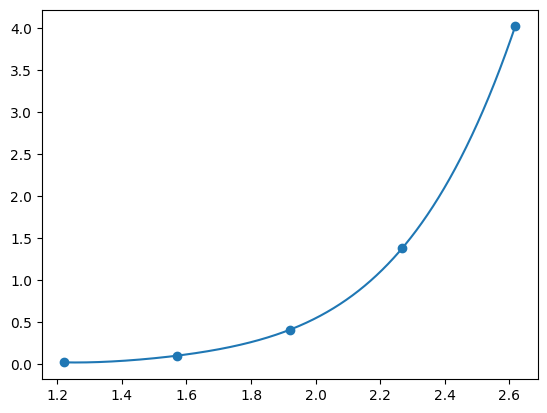

In [51]:
x=np.linspace(np.min(nodes_x),np.max(nodes_x),10000)
coef, y = Newton(nodes_x,nodes_y,x)
print(f"Полученные коэффициенты: {coef}")

for i in range (nodes_x.size):
    value = f(nodes_x[i],coef,nodes_x)
    print(f"Для узла x = {nodes_x[i]} - y={value}. Отличие от условия = {value-nodes_y[i]}")

plt.plot(x,y)
plt.scatter(nodes_x,nodes_y)
plt.show()

#### Интерполяция сплайном:
Напишем функцию для получения коэффициентов сплайна

In [52]:
def diff_point(point,step,f,coefficients,nodes_x):
    value = (f(point+step,coefficients,nodes_x)-f(point-step,coefficients,nodes_x))/(2*step)
    return value

In [53]:
def new_spline(nodes_x,f,coefficients,diff_point):
    data = np.zeros((nodes_x.shape[0]-1,4))
    for i in range (nodes_x.shape[0]-1):
        Pi = diff_point(nodes_x[i],1e-6,f,coef,nodes_x)
        Pi1 = diff_point(nodes_x[i+1],1e-6,f,coef,nodes_x) 
        xi = nodes_x[i]
        xi1 = nodes_x[i+1]
        fi = f(xi,coef,nodes_x)
        fi1 = f(xi1,coef,nodes_x)
        data[i][3] = (Pi1 * (xi1 - xi) - 2 * (fi1 - fi) + Pi * (xi1-xi)) / (xi1-xi)**3
        data[i][2] = (-1 * Pi1 * (xi1 - xi) * (xi1 + 2 * xi) + 3 * (fi1 - fi) * (xi1 + xi) - Pi * (xi1 - xi) * (xi + 2* xi1)) / (xi1-xi)**3
        data[i][1] = (Pi1 * xi * (2*xi1 + xi) * (xi1 - xi) - 6 * (fi1 - fi) * xi * xi1 + Pi * xi1 * (xi1 + 2*xi) * (xi1 - xi)) / (xi1-xi)**3
        data[i][0] = (-1 * Pi1 * xi * xi * xi1 * (xi1 - xi) + fi1 * xi * xi * (3 * xi1 - xi) + fi * xi1 * xi1 * (xi1 - 3*xi) - Pi * xi * xi1 * xi1 * (xi1-xi)) / (xi1-xi)**3
    return data


Для нашей задачи сами коэффициенты:

In [54]:
data = new_spline(nodes_x,f,coef,diff_point)
for i in range (nodes_x.shape[0]-1):
    print(f"Для отрезка [{nodes_x[i]}; {nodes_x[i+1]}]: {data[i]}")

Для отрезка [1.22173; 1.5708]: [ 2.56720145 -4.80198975  2.80613976 -0.47735049]
Для отрезка [1.5708; 1.91986]: [-5.92378212 11.41457363 -7.51763194  1.71341911]
Для отрезка [1.91986; 2.26893]: [-21.4264527   35.63924175 -20.1355557    3.90418871]
Для отрезка [2.26893; 2.61799]: [-47.01579034  69.47372288 -35.04765345   6.09495833]


Теперь введем функцию, которая будет выводить значение интерполянта в заданной точке 

In [55]:
def spline_point(x_nodes,point,data):
    for i in range(x_nodes.shape[0]-1):
        if (point >= x_nodes[i] and point <= x_nodes[i+1]):
            value = data[i][0] + data[i][1] * point + data[i][2] * point**2 + data[i][3] * point**3
            return value

Наконец, визуализируем полученную интерполяцию:

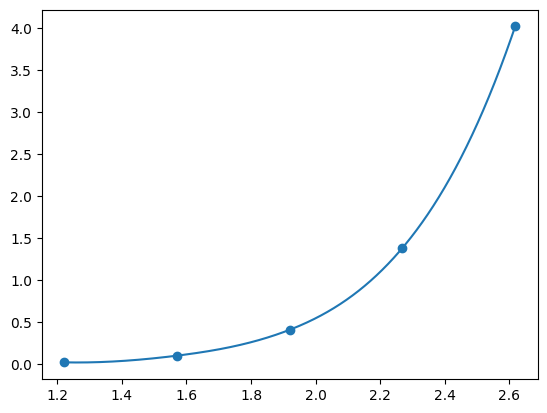

In [59]:
x=np.linspace(np.min(nodes_x),np.max(nodes_y),100000)
y=np.zeros_like(x)
for i in range (x.size):
    y[i] = spline_point(nodes_x,x[i],data)
    
plt.plot(x,y)
plt.scatter(nodes_x,nodes_y)
plt.show()

Посчитаем ошибку в узлах:

In [58]:
for i in range (nodes_x.shape[0]):
    value=spline_point(nodes_x,nodes_x[i],data)
    print(f"Для узла x = {nodes_x[i]} - y={value}. Отличие от условия = {value-nodes_y[i]}")    

Для узла x = 1.22173 - y=0.0184899999999959. Отличие от условия = -4.100886297209172e-15
Для узла x = 1.5708 - y=0.09801999999999578. Отличие от условия = -4.218847493575595e-15
Для узла x = 1.91986 - y=0.4063800000000306. Отличие от условия = 3.058664432842306e-14
Для узла x = 2.26893 - y=1.3808500000003079. Отличие от условия = 3.079758670310184e-13
Для узла x = 2.61799 - y=4.01767999999926. Отличие от условия = -7.407408020299044e-13
